## Big Data Final Project ##  

Dhruv Morzaria

Beixi Chen

Yan Jie (Ryan)

#### 1. Write R or Python code to download 1000 (at least) Tweets by calling Twitter's API, and save them into a corpus 

In [859]:
# Importing Libraries

# Making use of Tweepy Library for importing Twitter feed.

import tweepy
import time
import pandas as pd     
import numpy as np      
import re
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [860]:
# Setting Twitter API details:
CONSUMER_KEY    = 'RPCe4uwXFek9zyGTXtFUB0Qmo'
CONSUMER_SECRET = 'T88jc4ydsn4LScPPsFRkwsSZNGjB6mOsAJVLkHfLyBRGC1gRxm'

# Access:
ACCESS_TOKEN  = '300966200-MbfegZ8HBM7S0jYJXDjidWZDCRRDNJH26OUqNH30'
ACCESS_SECRET = 'oCRU6RtudFqCW2DsIt1vndKHexJvHbEthWWqxuLuBwPZz'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

In [861]:
# Twite API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [862]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweet_elon= extractor.user_timeline(screen_name="elonmusk", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweet_elon)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweet_elon[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

@Erdayastronaut @JeromeJaccard @Robotbeat @alan1bernard Stainless steel is correct, but different mixture of alloys… https://t.co/nT3If1VkvQ

@wangmeister If Tesla committed delivery &amp; customer made good faith efforts to receive before year end, Tesla will… https://t.co/kByO2QTGOo

@alan1bernard Coming soon

@wangmeister It will be tight, but Tesla production should have all mid-range Model 3 orders delivered by year end

@MikeKasprzik @Tesla Try connecting to WiFi



In [863]:
tweet_cnbc= extractor.user_timeline(screen_name="CNBC", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweet_cnbc)))

Number of tweets extracted: 200.



In [864]:
tweet_vala= extractor.user_timeline(screen_name="ValaAfshar", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweet_vala)))

Number of tweets extracted: 200.



In [865]:
tweet_trump= extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweet_trump)))

Number of tweets extracted: 200.



In [866]:
tweet_realtimers= extractor.user_timeline(screen_name="RealTimers", count=300)
print("Number of tweets extracted: {}.\n".format(len(tweet_realtimers)))

Number of tweets extracted: 200.



In [867]:
tweets_pink= extractor.user_timeline(screen_name="wesleysnipes", count=300)
print("Number of tweets extracted: {}.\n".format(len(tweets_pink)))

Number of tweets extracted: 200.



**2. Creating a dataframe**

In [868]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweet_elon]+[tweet.text for tweet in tweet_cnbc]
                    +[tweet.text for tweet in tweet_vala]+[tweet.text for tweet in tweet_trump]
                    +[tweet.text for tweet in tweet_realtimers]+[tweet.text for tweet in tweets_pink], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@Erdayastronaut @JeromeJaccard @Robotbeat @ala...
1,@wangmeister If Tesla committed delivery &amp;...
2,@alan1bernard Coming soon
3,"@wangmeister It will be tight, but Tesla produ..."
4,@MikeKasprzik @Tesla Try connecting to WiFi
5,Tesla has released all cars for sale where ori...
6,@quantumVerd @QuilletteM @pewdiepie Only if Da...
7,@QuilletteM Interesting
8,@Shedletsky 👌
9,💛 Bajirao Mastani 💛\nhttps://t.co/XbmDpiyfOP h...


In [869]:
# Internal methods of a single tweet object:
print(dir(tweet_realtimers[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [870]:
# We print info from the first tweet:
print(tweet_realtimers[0].id)
print(tweet_realtimers[0].created_at)
print(tweet_realtimers[0].source)
print(tweet_realtimers[0].favorite_count)
print(tweet_realtimers[0].retweet_count)
print(tweet_realtimers[0].geo)
print(tweet_realtimers[0].coordinates)
print(tweet_realtimers[0].entities)

1075468706996572160
2018-12-19 19:11:35
Twitter for iPhone
3844
485
None
None
{'user_mentions': [], 'urls': [], 'hashtags': [], 'media': [{'indices': [29, 52], 'type': 'photo', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1075468659017973760/pu/img/FJb_hbzPENAaQYdi.jpg', 'id': 1075468659017973760, 'expanded_url': 'https://twitter.com/RealTimers/status/1075468706996572160/video/1', 'sizes': {'large': {'resize': 'fit', 'h': 1080, 'w': 1080}, 'small': {'resize': 'fit', 'h': 680, 'w': 680}, 'thumb': {'resize': 'crop', 'h': 150, 'w': 150}, 'medium': {'resize': 'fit', 'h': 1080, 'w': 1080}}, 'url': 'https://t.co/96uBncZFsG', 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1075468659017973760/pu/img/FJb_hbzPENAaQYdi.jpg', 'id_str': '1075468659017973760', 'display_url': 'pic.twitter.com/96uBncZFsG'}], 'symbols': []}


### 2. Come up with a method to tag each tweet into Positive, Negative, or Neutral

1. Cleaning the Tweets -Function  to clean the text in the tweet by removing  links and special characters using regex.


2. Analizing the Twete for Positive, Negative, or Neutral Sentiments.


We use a Library called Textblob.
Desctiption of Textblob:

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [871]:
from textblob import TextBlob

def cleaning(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def create_sentiment(tweet):
    analysis = TextBlob(cleaning(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [872]:
# Creating a Sentiments Columns with will have our Labels
data['Sentiments'] = np.array([ create_sentiment(tweet) for tweet in data['Tweets'] ])
display(data.head(10))

,Tweets,Sentiments
0,@Erdayastronaut @JeromeJaccard @Robotbeat @ala...,1
1,@wangmeister If Tesla committed delivery &amp;...,1
2,@alan1bernard Coming soon,0
3,"@wangmeister It will be tight, but Tesla produ...",-1
4,@MikeKasprzik @Tesla Try connecting to WiFi,0
5,Tesla has released all cars for sale where ori...,1
6,@quantumVerd @QuilletteM @pewdiepie Only if Da...,0
7,@QuilletteM Interesting,1
8,@Shedletsky 👌,0
9,💛 Bajirao Mastani 💛\nhttps://t.co/XbmDpiyfOP h...,0


In [873]:
# Cleaning and Transforming each tweet as per our needs
data['Clean_tweets'] = np.array([cleaning(tweet) for tweet in data['Tweets']])
data.head()

,Tweets,Sentiments,Clean_tweets
0,@Erdayastronaut @JeromeJaccard @Robotbeat @ala...,1,Stainless steel is correct but different mixtu...
1,@wangmeister If Tesla committed delivery &amp;...,1,If Tesla committed delivery amp customer made ...
2,@alan1bernard Coming soon,0,Coming soon
3,"@wangmeister It will be tight, but Tesla produ...",-1,It will be tight but Tesla production should h...
4,@MikeKasprzik @Tesla Try connecting to WiFi,0,Try connecting to WiFi


#### Transforming our corpus of Tweets. We use Count Vectorizer and TFIDF for creating our feature space

In [874]:
# initialize tweets_vector object, and then turn into a vector 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
tweets_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)  
tweets_counts = tweets_vec.fit_transform(data.iloc[:,2])
tweets_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [875]:
# Convert raw frequency counts into TF-IDF (Term Frequency -- Inverse Document Frequency) values
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tweets_tfidf = tfidf_transformer.fit_transform(tweets_counts)
print('tweets_tfidf if a Sparse matrix as dispayes below.This will act as our Feature Sapce for Trainign our Model.')
tweets_tfidf.toarray()

tweets_tfidf if a Sparse matrix as dispayes below.This will act as our Feature Sapce for Trainign our Model.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

 1    575
 0    462
-1    163
Name: Sentiments, dtype: int64

--------------LABEL Counts--------------------
Number of Negative Sentiments:  163 
Percentage: 13.583333333333334

Number of Neutral Sentiments :  462 
Percentage: 38.5

Number of Positive Sentiments :  575 
Percentage: 47.91666666666667


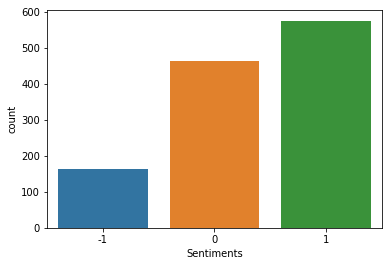

In [876]:
ax1 = sns.countplot(data.iloc[:,1],label="Count")
Positive, Neutral,Negative = data.iloc[:,1].value_counts()
print(data.iloc[:,1].value_counts())
print('\n--------------LABEL Counts--------------------')
print('Number of Negative Sentiments: ',Negative,'\nPercentage:',Negative/len(data.iloc[:,1])*100)
print('\nNumber of Neutral Sentiments : ',Neutral,'\nPercentage:',Neutral/len(data.iloc[:,1])*100)
print('\nNumber of Positive Sentiments : ',Positive,'\nPercentage:',Positive/len(data.iloc[:,1])*100)

Our sentiments are belong to three classes:   + for positive, - for negative and 0 for neutral sentiment.
In order to use evaluation metrics such as Preicison , Recall and F1 Score, we will need to binarize our labels, so that we can have vctors of 0's and 1's.(which will than be used to )

In [877]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
lb = label_binarize(data.iloc[:,1].values, classes=[0, 1, -1])
n_classes = lb.shape[1]
# Run classifier


## 3. Split the corpus into a training set and a validation set

**Tweets_tfidf will be our feature Space and the Sentiment Column will be out Label**

In [878]:
# Split data into training and test sets  
from sklearn.model_selection import train_test_split

# We use OneVsRestClassifier for Multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

x_train, x_test, y_train, y_test = train_test_split(tweets_tfidf, lb, test_size = 0.25, random_state = 12)
print(tweets_tfidf.shape, lb.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1200, 1678) (1200, 3)
(900, 1678) (300, 1678) (900, 3) (300, 3)


## 4. Apply two classifiers to build a sentiment model.

### Model 1 -  Multinomial Naive Bayes Classifier -  Training and Testing

In [879]:
# import CountVectorizer
from sklearn.metrics import precision_score, roc_curve, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve,auc
import nltk
from sklearn.metrics import confusion_matrix
from scipy import interp
from itertools import cycle
from sklearn import metrics

In [880]:
#Multinominal Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Train a Multimodal Naive Bayes classifier
nb_clf = OneVsRestClassifier(MultinomialNB())
nb_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=1)

In [881]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [882]:
import itertools
# Predicting the Test set results, find accuracy
y_pred = nb_clf.predict(x_test)
#y_score = nb_clf.decision_function(x_test)
print("Accuracy for Naive Bayes Classifier: ", (accuracy_score(y_test,y_pred))*100)

for i in range(n_classes):
    cnf_matrix =metrics.confusion_matrix(y_test[:,i], y_pred[:,i])
    print('\n Confusion Matrix for each of Class separately:')
    print('\nClasses ', i , '\n' ,cnf_matrix)
    #print((y_test[:,i]),(y_pred[:,i]))
    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, title='Confusion matrix')
   

Accuracy for Naive Bayes Classifier:  43.666666666666664

 Confusion Matrix for each of Class separately:

Classes  0 
 [[178   3]
 [ 94  25]]

 Confusion Matrix for each of Class separately:

Classes  1 
 [[123  44]
 [ 28 105]]

 Confusion Matrix for each of Class separately:

Classes  2 
 [[252   0]
 [ 47   1]]


In [883]:
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
print('Precision-recall score for Class 0 :',(average_precision[0])*100)
print('Precision-recall score for Class 1 :',(average_precision[1])*100)
print('Precision-recall score for Class 2 :',(average_precision[2])*100)


print('The classes are labelled 0,1 and 2 because we have used Label Binarizer earlier which converted our Sentiments\
0, +1 and -1  into classes 0, 1 and 2')

Precision-recall score for Class 0 : 48.37509926716519
Precision-recall score for Class 1 : 56.61754084738918
Precision-recall score for Class 2 : 28.18791633834841
The classes are labelled 0,1 and 2 because we have used Label Binarizer earlier which converted our Sentiments0, +1 and -1  into classes 0, 1 and 2


Average precision score, micro-averaged over all classes: 49.44


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=49.44')

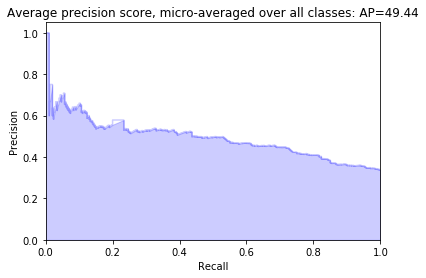

In [884]:
from sklearn.metrics import average_precision_score
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")


print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]*100))


### Plotting
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]*100))

### AUC ROC

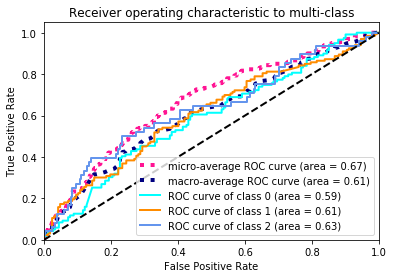

In [885]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


## Model 2 Support Vector Machine -  Training and Testing

In [886]:
# Apply SVM classification
from sklearn.svm import SVC
svc_clf = OneVsRestClassifier(SVC(kernel='linear'))
svc_clf.fit(x_train,y_train)
y_pred2 = svc_clf.predict(x_test)
y_score = svc_clf.decision_function(x_test)
print(y_pred2)
print("Accuracy score is ", accuracy_score(y_test,y_pred2)*100)
print(y_test)

[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 

### 5. Model Performance  for SVM using precision/recall & ROC

In [887]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
print('Precision-recall score for Class 0 :',(average_precision[0])*100)
print('Precision-recall score for Class 1 :',(average_precision[1])*100)
print('Precision-recall score for Class 2 :',(average_precision[2])*100)


print('The classes are labelled 0, 1 and 2 because we have used Label Binarizer earlier which converted our Sentiments \
0, +1 and -1  into classes 0,1 and 2')

Precision-recall score for Class 0 : 72.56874899748166
Precision-recall score for Class 1 : 82.55985532142527
Precision-recall score for Class 2 : 46.07392876265357
The classes are labelled 0, 1 and 2 because we have used Label Binarizer earlier which converted our Sentiments 0, +1 and -1  into classes 0,1 and 2


### 7. Visualize your results for Support Vector Machine 

Average precision score, micro-averaged over all classes: 73.36


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=73.36')

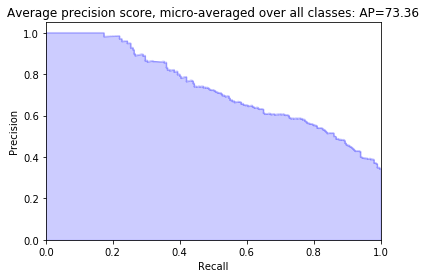

In [888]:
from sklearn.metrics import average_precision_score
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")


print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]*100))


### Plotting
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]*100))

### AUC ROC For Support Vector Machine

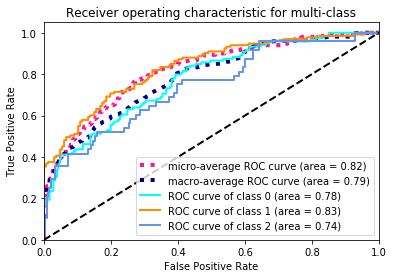

In [889]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


#### Applying Cross Validation on the Support Vector Classifier to improve the result.

In [890]:
# split data in train test sets of 10 folds
skf = StratifiedKFold(data.iloc[:,1],n_folds=10)
x = tweets_tfidf
y = data.iloc[:,1]

In [891]:
# Tunning hyper Parameter - Kernel function
for KERNEL in ['sigmoid', 'poly', 'rbf', 'linear']:
    
    clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr',\
          degree=3, gamma='auto', kernel=KERNEL,max_iter=-1, probability=False, random_state=None,\
          shrinking=True,tol=0.001, verbose=False)
    accuracy = []
    for train_index, test_index in skf:
                        
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(x_train,y_train)

        y_pred = clf.predict(x_test)
        
        accuracy.append(accuracy_score(y_test,y_pred))
        
    print('--------------------------------------------')
    print('Average Accuracy score', np.mean(accuracy)*100)
    print('Kernel -  ', KERNEL)

--------------------------------------------
Average Accuracy score 47.91783164966298
Kernel -   sigmoid
--------------------------------------------
Average Accuracy score 47.91783164966298
Kernel -   poly
--------------------------------------------
Average Accuracy score 47.91783164966298
Kernel -   rbf
--------------------------------------------
Average Accuracy score 65.39956848475741
Kernel -   linear


## Conclusion

As you can see, Naive Bayes Classifier gives us an accuracy of approx. 44 % while the Support Vector Machine with Linear Kernel
performs much better with accuracy of approx. 65%.


This concludes our project- 'Sentiment Analysis on Twitter Feed.'. 